In [90]:
from urllib.request import urlopen as ureq
from urllib import request


In [91]:
from bs4 import BeautifulSoup as soup
import lxml

In [92]:
my_url = 'https://www.flipkart.com/search?q=masks&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=1'

In [93]:
# opening a client connection,
uclient = ureq(my_url)

# grabbing/reading the html page and storing it in a variable
page_html = uclient.read()

# finally closing the client
uclient.close()


In [94]:
# displaying the contents of the website
page_html

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n\t<link href="https://rukminim1.flixcart.com" rel="dns-prefetch" />\n\t<link href="https://img1a.flixcart.com" rel="dns-prefetch" />\n\t<link rel="stylesheet" href="//img1a.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.e527e7.css" />\n\n\t<link rel="preload" href="//img1a.flixcart.com/www/linchpin/fk-cp-zion/img/fk-logo_9fddff.png" as="image">\n\n\t<meta http-equiv="Content-type" content="text/html; charset=utf-8"/>\n\t<meta http-equiv="X-UA-Compatible" content="IE=Edge" />\n\t<meta property="fb:page_id" content="102988293558"/>\n\t<meta property="fb:admins" content="658873552,624500995,100000233612389"/>\n\t<meta name="robots" content="noodp" />\n\n\t<link rel=\'shortcut icon\' href="https://img1a.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" />\n\n\t<link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/>\n\n\t<meta property="og:type" content="website"/>\n\t<meta name="og_site_name" prop

In [95]:
# After the entire html file is loaded, now is the time to parse the extracted information using BeautifulSoup
page_soup = soup(page_html,'lxml')

In [96]:
# once the parsing is done, then is the time to find and pick up the required containers
containers = page_soup.findAll("div",{"class":"_3liAhj"})

In [97]:
# checking the length of the container as this will contain the information such as product name, product desc,
# price, rating etc
len(containers)

40

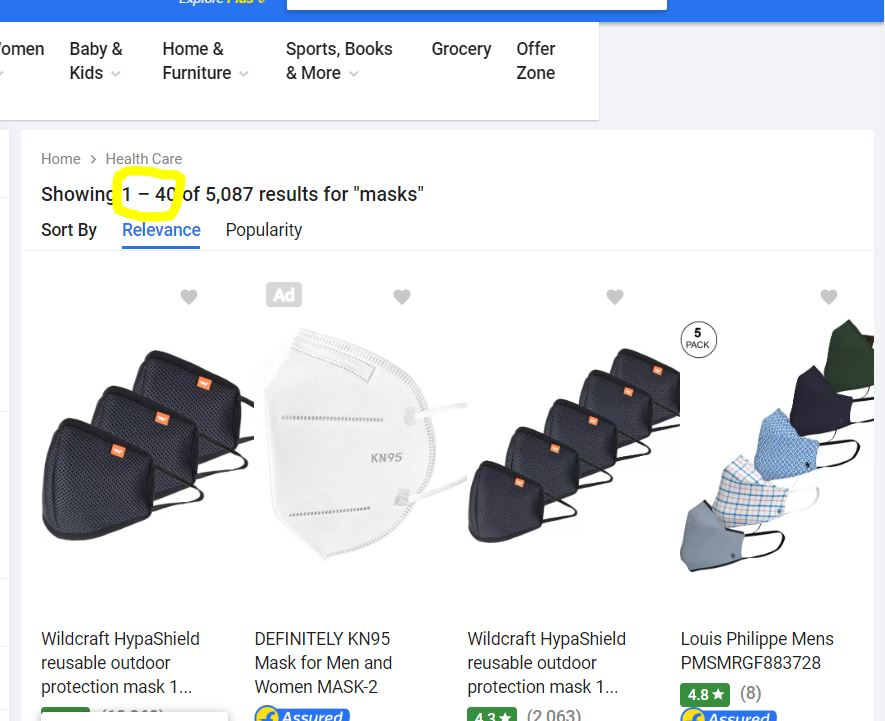

In [98]:
# using the prettify function to understand the container information
print(containers[0].prettify())

<div class="_3liAhj">
 <a class="Zhf2z-" href="/wildcraft-hypashield-reusable-outdoor-protection-mask-12535-black/p/itm6868a616ffc4e?pid=MRPFQN3ZKKEE75ZV&amp;lid=LSTMRPFQN3ZKKEE75ZVDNBOND&amp;marketplace=FLIPKART&amp;srno=s_1_1&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=a51c2de7-a057-4656-ac81-06a2a625995e.MRPFQN3ZKKEE75ZV.SEARCH&amp;ssid=mwpdsc06680000001589119630138&amp;qH=ce38fdcaab276279" rel="noopener noreferrer" target="_blank">
  <div style="-webkit-filter:grayscale(1);-moz-filter:grayscale(1);-o-filter:grayscale(1);-ms-filter:grayscale(1);filter:grayscale(1);opacity:0.6">
   <div>
    <div class="_3BTv9X" style="height:280px;width:200px">
     <img alt="Wildcraft HypaShield reusable outdoor protection mask 12535-Black" class="_1Nyybr" src="//img1a.flixcart.com/www/linchpin/fk-cp-zion/img/placeholder_9951d0.svg"/>
    </div>
   </div>
  </div>
  <div class="_3aV9Tq">
   <span class="_1GJ2ZM">
    Not Deliverable
   </span>
  </div>
  <div class="_3gDSOa _3iG

In [112]:
# Steps for file preparation
filename = "products.csv"
f = open(filename, "w")

headers = "product_name, Old_price, New_price, Ratings, Total_Reviews\n"

f.write(headers)

59

In [113]:
for container in containers:
    # use the request module from the urllib package
    title = container.find("a", title=True).get('title')
    new_price = container.find("div",{"class":"_1vC4OE"}).text
    
    # condition to handle products which do not have old prices, discounts and ratings
    if container.find("div",{"class":"_3auQ3N"}):
        old_price = container.find("div",{"class":"_3auQ3N"}).text
    else:
        old_price = new_price
            
    #if old_price != new_price:
        #discount = ((float(new_price.replace("₹","")) - float(old_price.replace("₹",""))) / float(old_price.replace("₹",""))) * 100
    #else:
        #discount = 0
    
    if container.find("div",{"class":"hGSR34"}):
        rating = container.find("div",{"class":"hGSR34"}).get_text()
    else:
        rating =""
    
    if container.find("span",{"class":"_38sUEc"}):
        review_count = container.find("span", {"class" : "_38sUEc"}).text
    else:
        review_count = "0"
            
    
    print("product: ", title)
    print("Old Price: ",old_price)
    #print("dicount offered: ", discount)
    print("New price: ",new_price)
    print("product rating /5: ", rating)
    print("number of reviews: ",review_count)
    
    f.write(title.replace(",","|") + "," + old_price + "," + new_price + "," + rating + "," + review_count + "\n")
    
f.close()

product:  Wildcraft HypaShield reusable outdoor protection mask 12535-Black
Old Price:  ₹600
New price:  ₹539
product rating /5:  4.1
number of reviews:  (11,861)
product:  Wildcraft HypaShield reusable outdoor protection mask 12536-Black
Old Price:  ₹1,000
New price:  ₹879
product rating /5:  4.3
number of reviews:  (2,233)
product:  Flipkart SmartBuy Health+ KN95 WSX-26-1
Old Price:  ₹400
New price:  ₹260
product rating /5:  3.8
number of reviews:  (20)
product:  Wildcraft HypaShield reusable outdoor protection mask 12538
Old Price:  ₹1,400
New price:  ₹1,189
product rating /5:  4.3
number of reviews:  (803)
product:  Louis Philippe Mens LPMSMRGFX03699
Old Price:  ₹599
New price:  ₹599
product rating /5:  3.4
number of reviews:  (202)
product:  Allen Solly AHMSCRGP852209
Old Price:  ₹499
New price:  ₹499
product rating /5:  4.5
number of reviews:  (12)
product:  Peter England PE040 Surgical Mask With Melt Blown Fabric Layer
Old Price:  ₹400
New price:  ₹400
product rating /5:  4.5
nu